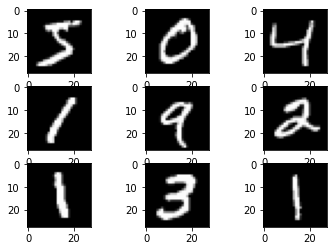

In [94]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from sklearn.utils import shuffle
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import numpy as np
import cv2



(trainX, trainY), (testX, testY) = mnist.load_data()

for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()


In [95]:
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

trainX= trainX.astype('float32')
testX = testX.astype('float32')
trainX = trainX / 255.0
testX = testX / 255.0

trainX, trainY = shuffle(trainX, trainY, random_state=0)

print(trainX[0].shape)

(28, 28, 1)


In [122]:
model = keras.models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=trainX[0].shape),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model_2 = keras.models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=trainX[0].shape),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model_3 = keras.models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(2,2), activation='relu', input_shape=trainX[0].shape),
    layers.MaxPooling2D((1,1)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])



print(model_3.summary())

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_71 (Conv2D)          (None, 27, 27, 64)        320       
                                                                 
 max_pooling2d_71 (MaxPoolin  (None, 27, 27, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_72 (Conv2D)          (None, 24, 24, 128)       131200    
                                                                 
 max_pooling2d_72 (MaxPoolin  (None, 12, 12, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_73 (Conv2D)          (None, 9, 9, 256)         524544    
                                                                 
 max_pooling2d_73 (MaxPoolin  (None, 4, 4, 256)      

In [109]:
model_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
fitting = model_3.fit(trainX, trainY, epochs=10, validation_split= 0.25)
# if validation acc < acc => overfitting (incase of overfitting => dropout layers)
# if validation acc almost = acc => doing well
print(fitting)

Epoch 1/10
1407/1407 [==============================] - 123s 86ms/step - loss: 0.1756 - accuracy: 0.9452 - val_loss: 0.0622 - val_accuracy: 0.9800
Epoch 2/10
1407/1407 [==============================] - 121s 86ms/step - loss: 0.0560 - accuracy: 0.9831 - val_loss: 0.0495 - val_accuracy: 0.9841
Epoch 3/10
1407/1407 [==============================] - 119s 85ms/step - loss: 0.0381 - accuracy: 0.9880 - val_loss: 0.0387 - val_accuracy: 0.9881
Epoch 4/10
1407/1407 [==============================] - 120s 85ms/step - loss: 0.0299 - accuracy: 0.9907 - val_loss: 0.0739 - val_accuracy: 0.9789
Epoch 5/10
1407/1407 [==============================] - 142s 101ms/step - loss: 0.0232 - accuracy: 0.9931 - val_loss: 0.0415 - val_accuracy: 0.9881
Epoch 6/10
1407/1407 [==============================] - 146s 104ms/step - loss: 0.0177 - accuracy: 0.9943 - val_loss: 0.0368 - val_accuracy: 0.9896
Epoch 7/10
1407/1407 [==============================] - 137s 98ms/step - loss: 0.0160 - accuracy: 0.9948 - val_loss:

In [110]:
(testLoss, testAcc) = model_3.evaluate(testX, testY)
print("Test loss accuracy: ", testLoss, "\nTest validation accuracy: ", testAcc)


313/313 [==============================] - 4s 13ms/step - loss: 0.0423 - accuracy: 0.9897
Test loss accuracy:  0.04234708100557327 
Test validation accuracy:  0.9897000193595886


[8, 7, 0, 1, 1, 0]


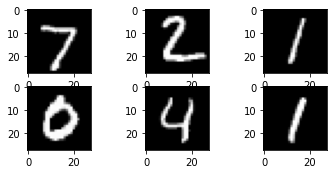

In [128]:
prediction = model_3.predict(testX)
prediction_arr = [np.argmax(i) for i in prediction]
print(prediction_arr[:6])

for i in range(6):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(testX[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

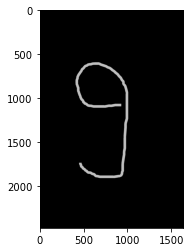

In [123]:
#add image and predict
img=plt.imread(r'C:\Users\dell\Desktop\9.png')
plt.imshow(img)



In [127]:
gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
resized= cv2.resize(gray,(28,28),interpolation= cv2.INTER_AREA)
#print(gray.shape)

In [ ]:
#print(resized.shape)

 newIMG=keras.utils.normalize(resized, axis=1)
newIMG= np.array(newIMG).reshape(-1, 28, 28, 1)
print(newIMG.shape)

In [119]:
newIMG=keras.utils.normalize(resized, axis=1) 
newIMG= np.array(newIMG).reshape(-1, 28, 28, 1) 

In [126]:
prediction = model_3.predict(newIMG)
print(np.argmax(prediction))

0
